## About the dataset

## This dataset contains information about the sales of shoes in a particular region. The data includes information on the brand, model, type of shoe, gender, size, color, material, and price.

### Column Details
#### Brand: The brand of the shoe, such as Nike, Adidas, or Reebok.

#### Model: The specific model name or number of the shoe, such as Air Jordan 1, Ultra Boost 21, or Classic Leather.

#### Type: The type of shoe, such as running, casual, or skate. This column describes the intended use or function of the shoe.

#### Gender: The gender the shoe is designed for, such as men, women, or unisex. This column specifies the target demographic for the shoe.

#### Size: The size of the shoe, using US sizing. This column indicates the length of the shoe in inches or centimeters.

#### Color: The color of the shoe's exterior. This column describes the predominant color or color combination of the shoe.

#### Material: The primary material of the shoe, such as leather, mesh, or suede. This column indicates the material that comprises the majority of the shoe's construction.

#### Price: The price of the shoe, in US dollars. This column specifies the cost of purchasing the shoe.

#### The purpose of creating this dataset is solely for educational use, and any commercial use is strictly prohibited and this dataset was large language models generated and not collected from actual data sources.

Importing Libraries

In [1]:
import numpy as np # array
import pandas as pd # data frame manipulation
import matplotlib.pyplot as plt # plotting
import plotly.express as px # interactive plotting
import seaborn as sns # data visualization

Importing dataset

In [2]:
shoe = pd.read_csv('Shoe prices.csv')

In [3]:
# head of the data set
shoe.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


Analyzing and cleaning the data

In [4]:
shoe.head()

,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00


In [5]:
print("\nMissing Values:\n", shoe.isnull().sum())


Missing Values:
 Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64


In [6]:
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


Size and Price column of the data set is numeric but it is object in the data set

In [7]:
# converting the Size column from object to float
shoe['Size'].unique()

array(['US 10', 'US 9.5', 'US 11', 'US 8', 'US 7.5', 'US 8.5', 'US 6.5',
       'US 10.5', 'US 9', 'US 7', 'US 6', 'US 11.5', 'US 12'],
      dtype=object)

In [8]:
# replacing the US into empty string
shoe["Size"] = shoe["Size"].str.replace("US ","")

In [9]:
# changing the data type into float because it has some decimal in it
shoe["Size"] = shoe["Size"].astype(float)

In [10]:
print(f"the data type of Size column is {shoe['Size'].dtype}")

the data type of Size column is float64


In [11]:
# first of all changing the column name Price (USD) to Price 
shoe.rename(columns = {'Price (USD)':'Price'}, inplace = True)

In [12]:
# Now we will be converting the Price column from object to float
shoe['Price'].unique()

array(['$170.00 ', '$180.00 ', '$75.00 ', '$55.00 ', '$80.00 ', '$65.00 ',
       '$175.00 ', '$160.00 ', '$110.00 ', '$150.00 ', '$70.00 ',
       '$50.00 ', '$90.00 ', '$140.00 ', '$120.00 ', '$130.00 ',
       '$85.00 ', '$60.00 ', '$100.00 ', '$35.00 ', '$165.00 ',
       '$220.00 ', '$200.00 ', '$55 ', '$105.00 ', '$135.00 ', '$54.99 ',
       '$250.00 ', '$25.00 ', '$89.99 ', '$59.00 ', '$125.00 ', '$95.00 '],
      dtype=object)

In [13]:
shoe["Price"] = shoe["Price"].str.replace("$","")
shoe["Price"] = shoe["Price"].astype(float)

In [14]:
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     1006 non-null   object 
 1   Model     1006 non-null   object 
 2   Type      1006 non-null   object 
 3   Gender    1006 non-null   object 
 4   Size      1006 non-null   float64
 5   Color     1006 non-null   object 
 6   Material  1006 non-null   object 
 7   Price     1006 non-null   float64
dtypes: float64(2), object(6)
memory usage: 63.0+ KB


In [15]:
shoe.describe()

,Size,Price
count,1006.000000,1006.000000
mean,8.912028,101.306143
std,1.449297,39.215451
min,6.000000,25.000000
25%,8.000000,70.000000
50%,9.000000,90.000000
75%,10.000000,130.000000
max,12.000000,250.000000


In [16]:
print(shoe[shoe["Price"] ==25])
print()
print(shoe[shoe["Price"] ==250])

      Brand            Model    Type Gender  Size Color   Material  Price
595  Adidas  Adilette Shower  Slides  Women   6.0  Pink  Synthetic   25.0

    Brand                 Model     Type Gender  Size        Color Material  \
555  Nike  ZoomX Vaporfly Next%  Running    Men  10.0  Black/White     Mesh   

     Price  
555  250.0  


In [17]:
shoe["Model"]

0            Air Jordan 1
1          Ultra Boost 21
2         Classic Leather
3            Chuck Taylor
4            Future Rider
              ...        
1001    Fresh Foam 880v11
1002      Gel-Kayano Lite
1003             Venom 94
1004              Summits
1005           Air Max 97
Name: Model, Length: 1006, dtype: object

#### Insights:
##### Brand: In the Brand, it has number of shoes name brand like Adidas, Nike etc.

##### Model: It is has the Model name of the Shoe.

##### Type: It is the type of the shoe like Running, Slides etc.

##### Gender: It is the categorical column that has men and woman in their column.

##### Size: It is numerical column that has the size of the shoe.

##### Color: It is the color of the shoe.

##### Material: It is the material of the shoe that is used to made that specific shoe.

##### Price: It is the price of the shoe. the highest price is 250$. It is also numerical column.

## Visualizations:


In [18]:
shoe.columns

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material',
       'Price'],
      dtype='object')

<Axes: xlabel='Brand', ylabel='Count'>

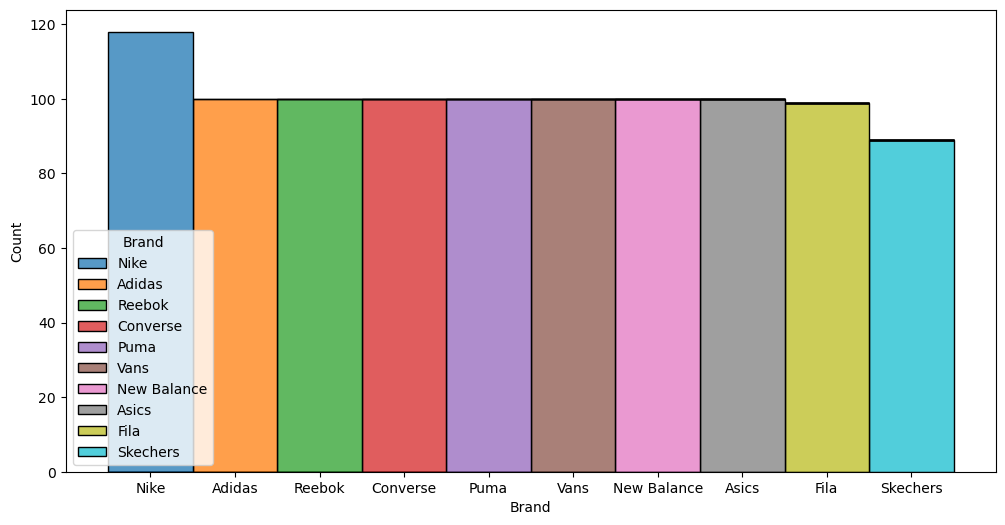

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(shoe , x = 'Brand', hue='Brand', multiple='stack', bins=20)

#### Nike has the highest number of entries in the dataset. but all the Shoe brand have same entries in the data. There is such difference in it.

Text(0.5, 1.0, 'Shoe Prices')

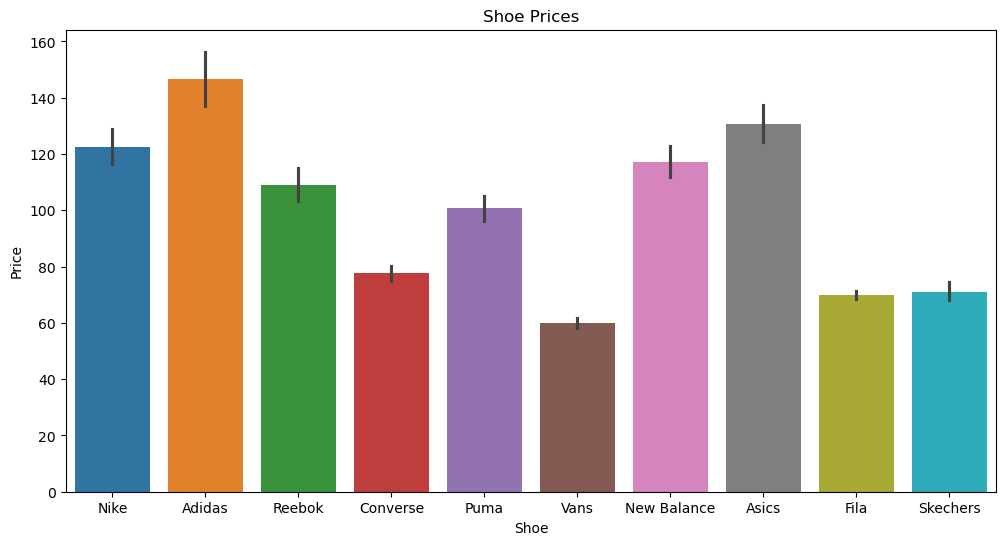

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot( shoe,x= 'Brand', y= 'Price',hue='Brand')

# Customize the plot
plt.xlabel('Shoe')
plt.ylabel('Price')
plt.title('Shoe Prices')

#### The Adidas has the highest price of shoes in the data set. the second one is Asics, the third one is Nike.

In [21]:
contigency = pd.crosstab(shoe['Gender']  , shoe['Color'] )

In [22]:
contigency

Color,Beige,Black,Black/Blue,Black/Gold,Black/Gold/Red,Black/Green,Black/Grey,Black/Gum,Black/Pink,Black/Red,...,White/Grey,White/Navy,White/Navy/Red,White/Pink,White/Red,White/Red/Blue,White/Red/Navy,Yellow,Yellow/Black,Zebra
Gender,,,,,,,,,,,,,,,,,,,,,
Men,2,114,1,2,0,2,9,1,0,7,...,2,9,6,0,5,1,2,3,0,1
Women,2,64,0,1,1,0,3,0,15,0,...,4,3,0,7,1,0,0,5,1,0


In [23]:
shoe['Color'].value_counts().sort_values(ascending=False)

Color
Black              178
White              139
Grey               101
Black/White        100
Pink                64
                  ... 
Brown                1
Green/Black          1
Clay Brown           1
Natural Ivory        1
Collegiate Navy      1
Name: count, Length: 82, dtype: int64

#### Black and white color of the shoes is the most common color of the shoes in both Genders.

In [24]:
shoe.groupby(shoe['Gender'])['Price'].sum()

Gender
Men      54878.99
Women    47034.99
Name: Price, dtype: float64

#### There is no significance difference in purchases done by both genders. this show that Not only man loves shoes to wear but the woman too.

In [25]:
shoe['Size'].mean()

np.float64(8.912027833001988)

#### The most common shoe size is 8.9. It is the most common shoe size choose by both gender.



In [26]:
shoe.groupby('Price')['Size'].value_counts()

Price  Size
25.0   6.0     1
35.0   6.0     2
50.0   9.5     8
       8.5     7
       6.5     5
              ..
220.0  11.0    2
       7.0     1
       7.5     1
       8.0     1
250.0  10.0    1
Name: count, Length: 231, dtype: int64

<Axes: xlabel='Size', ylabel='Price'>

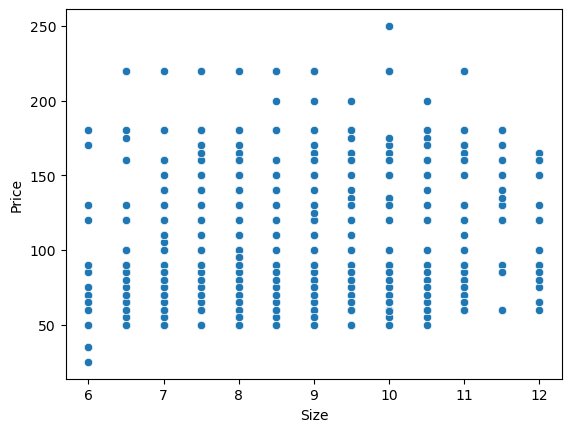

In [27]:
sns.scatterplot(shoe, x='Size' , y='Price')

In [28]:
px.scatter(shoe, x='Size' , y='Price')

#### As you can see above there is no significant difference between Price and Size. There is only some shoe sizes that has high price

In [29]:
shoe['Type'].value_counts()

Type
Running           332
Casual            243
Skate             100
Fashion            86
Lifestyle          76
Basketball         52
Walking            46
Training           34
Crossfit           11
Trail               6
Weightlifting       4
Slides              3
CrossFit            3
Trail Running       3
Retro               3
Hiking              2
Cross-training      1
Racing              1
Name: count, dtype: int64

In [30]:
px.histogram(shoe , 'Type')

In [31]:
shoe['Type'].value_counts()

Type
Running           332
Casual            243
Skate             100
Fashion            86
Lifestyle          76
Basketball         52
Walking            46
Training           34
Crossfit           11
Trail               6
Weightlifting       4
Slides              3
CrossFit            3
Trail Running       3
Retro               3
Hiking              2
Cross-training      1
Racing              1
Name: count, dtype: int64

#### As you can see above the Running Type shoe is the most common shoe type in data. These are the others type shoes :

##### Running
##### Casual
##### Skate
##### Fashion
##### Lifestyle
##### Basketball
##### Walking
##### Training
##### Crossfit

In [32]:
shoe.groupby('Type')['Price'].mean().sort_values(ascending=False)

Type
Weightlifting     187.500000
Cross-training    130.000000
Crossfit          130.000000
CrossFit          130.000000
Running           129.081325
Lifestyle         122.828947
Trail Running     113.333333
Basketball        112.692308
Training          110.294118
Racing            110.000000
Trail              99.166667
Retro              90.000000
Fashion            83.895349
Casual             79.938230
Hiking             77.500000
Walking            64.978043
Skate              62.200000
Slides             31.666667
Name: Price, dtype: float64

In [33]:
shoe_01 = shoe.groupby('Type')['Price'].mean().reset_index()
px.histogram(shoe_01 , x = 'Type' , y = 'Price')

In [34]:
shoe.groupby('Type')['Price'].mean().reset_index().sort_values(by='Price',ascending=False)

,Type,Price
17,Weightlifting,187.500000
2,Cross-training,130.000000
4,Crossfit,130.000000
3,CrossFit,130.000000
10,Running,129.081325
7,Lifestyle,122.828947
14,Trail Running,113.333333
0,Basketball,112.692308
15,Training,110.294118
8,Racing,110.000000


Weightlifting has the highest shoe price average in the data set.

<Axes: xlabel='Size', ylabel='Count'>

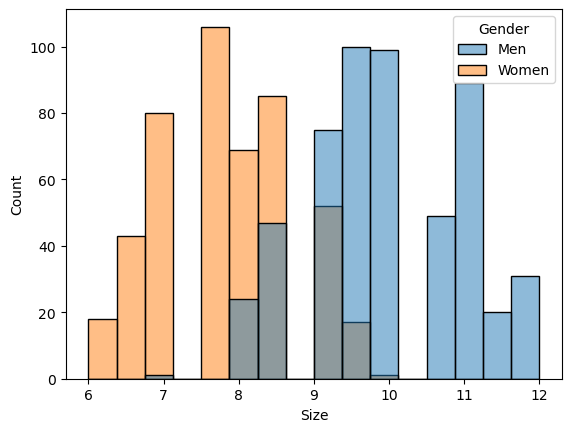

In [35]:
sns.histplot(shoe , x = 'Size' , hue='Gender')

In [36]:
px.histogram(shoe , x = 'Size' , color='Gender')

Upon examining the plot, it is observed that the female sizes are predominantly concentrated between 6 and 9, indicating a narrower range of sizes compared to males. This suggests that, in the dataset, females tend to have smaller shoe sizes overall. On the other hand, the male sizes span a wider range, starting from 8 and extending to 12. This indicates that males have a broader distribution of shoe sizes, with a tendency towards larger sizes.

In [37]:
px.histogram(shoe , x = 'Type' , color='Gender')

Upon analyzing the plot, it can be observed that the distribution of shoe types appears to be relatively consistent across genders. The counts of each shoe type, as indicated by the height of the bars, do not show significant variations when comparing males and females.

This suggests that there may not be a strong correlation between the specific shoe type and gender in the given dataset. The frequencies of each shoe type do not differ noticeably between males and females, implying that both genders are likely to have similar preferences or proportions for each shoe type.

## Feature encoding With Scikit Learn

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
LE = LabelEncoder()

In [40]:
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     1006 non-null   object 
 1   Model     1006 non-null   object 
 2   Type      1006 non-null   object 
 3   Gender    1006 non-null   object 
 4   Size      1006 non-null   float64
 5   Color     1006 non-null   object 
 6   Material  1006 non-null   object 
 7   Price     1006 non-null   float64
dtypes: float64(2), object(6)
memory usage: 63.0+ KB


In [41]:
shoe['Gender_Encoded'] = LE.fit_transform(shoe['Gender'])


In [42]:
shoe['Gender_Encoded']

0       0
1       0
2       0
3       1
4       1
       ..
1001    1
1002    0
1003    1
1004    0
1005    1
Name: Gender_Encoded, Length: 1006, dtype: int64

In [43]:
shoe['Price'].unique().max()

np.float64(250.0)

In [44]:
shoe['Price'].unique().min()

np.float64(25.0)

In [45]:
# define the bins and labels
bins = [0,50 , 150,250]
labels = ['Low' , 'Medium' , 'High']
shoe['Price_Discrete'] = pd.cut(shoe['Price'] , bins=bins , labels=labels)

In [46]:
shoe['Price_Discrete'].value_counts()

Price_Discrete
Medium    837
High      127
Low        42
Name: count, dtype: int64

In [47]:
shoe['Price_Encoded'] = LE.fit_transform(shoe['Price_Discrete'])

In [48]:
shoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           1006 non-null   object  
 1   Model           1006 non-null   object  
 2   Type            1006 non-null   object  
 3   Gender          1006 non-null   object  
 4   Size            1006 non-null   float64 
 5   Color           1006 non-null   object  
 6   Material        1006 non-null   object  
 7   Price           1006 non-null   float64 
 8   Gender_Encoded  1006 non-null   int64   
 9   Price_Discrete  1006 non-null   category
 10  Price_Encoded   1006 non-null   int64   
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 79.8+ KB


In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [50]:
# Feature engineered again to ensure no issues with the data
def prepare_features(df):
    """Prepare features for modeling"""
    # Make a copy to avoid modifying the original
    df_processed = df.copy()
    
    # Clean and convert Size column - extract numeric value from strings like "US 7"
    if 'Size' in df_processed.columns:
        # Check if Size contains strings like "US 7"
        if df_processed['Size'].dtype == 'object':
            # Extract numeric part from strings like "US 7"
            df_processed['Size'] = df_processed['Size'].str.replace('US ', '', regex=True)
            # Convert to float
            df_processed['Size'] = pd.to_numeric(df_processed['Size'], errors='coerce')
    
    # Clean Price column if needed (remove dollar signs, etc.)
    if 'Price' in df_processed.columns and df_processed['Price'].dtype == 'object':
        # Remove $ and convert to float
        df_processed['Price'] = df_processed['Price'].str.replace('[$,]', '', regex=True)
        df_processed['Price'] = df_processed['Price'].str.strip()
        df_processed['Price'] = pd.to_numeric(df_processed['Price'], errors='coerce')
    
    # Handle categorical features
    # For columns with high cardinality like Model and Color, we might need a different approach
    # For now, let's keep Brand, Type, Gender, and Material
    
    categorical_features = ['Brand', 'Type', 'Gender', 'Material']
    numerical_features = ['Size']
    
    # We'll use one-hot encoding for categorical features
    # We'll drop Color and Model due to high cardinality
    
    return df_processed, categorical_features, numerical_features


In [51]:
# Model Building 
def build_and_evaluate_models(df, categorical_features, numerical_features):
    """Build and evaluate multiple regression models"""
    # Prepare X and y
    X = df.drop(['Price', 'Model', 'Color'], axis=1)  # Drop high cardinality features
    y = df['Price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
            ('num', StandardScaler(), numerical_features)
        ])
    
    # Define models to try
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(),
        'Lasso Regression': Lasso(),
        'Random Forest': RandomForestRegressor(random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(random_state=42)
    }
    # Train and evaluate models
    results = {}
    
    for name, model in models.items():
        # Create pipeline
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('model', model)
        ])
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Predict
        y_pred = pipeline.predict(X_test)
        
        # Evaluate
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        
        results[name] = {
            'MSE': mse,
            'RMSE': rmse,
            'R2': r2,
            'MAE': mae
        } 
        print(f"Model: {name}")
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Root Mean Squared Error: {rmse:.2f}")
        print(f"R² Score: {r2:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")
        print("-" * 50)
    
    return results, preprocessor, models


In [52]:
# MODEL TUNING
def tune_best_model(X, y, best_model_name, preprocessor):
    """Tune the hyperparameters of the best model"""
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Define parameter grid based on the best model
    if best_model_name == 'Random Forest':
        model = RandomForestRegressor(random_state=42)
        param_grid = {
            'model__n_estimators': [50, 100, 200],
            'model__max_depth': [None, 10, 20, 30],
            'model__min_samples_split': [2, 5, 10],
            'model__min_samples_leaf': [1, 2, 4]
        }
    elif best_model_name == 'Gradient Boosting':
        model = GradientBoostingRegressor(random_state=42)
        param_grid = {
            'model__n_estimators': [50, 100, 200],
            'model__learning_rate': [0.01, 0.1, 0.2],
            'model__max_depth': [3, 5, 7],
            'model__min_samples_split': [2, 5, 10]
        }
    elif best_model_name == 'Ridge Regression':
        model = Ridge()
        param_grid = {
            'model__alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
        }
    elif best_model_name == 'Lasso Regression':
        model = Lasso()
        param_grid = {
            'model__alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
        }
    else:  # Linear Regression has no hyperparameters to tune
        model = LinearRegression()
        param_grid = {}
    
    # Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # If there are parameters to tune
    if param_grid:
        # Perform grid search
        grid_search = GridSearchCV(
            pipeline, 
            param_grid=param_grid, 
            cv=5, 
            scoring='neg_mean_squared_error',
            n_jobs=-1
        )
        
        # Fit grid search
        grid_search.fit(X_train, y_train)
        
        # Best parameters
        best_params = grid_search.best_params_
        print(f"Best Parameters: {best_params}")
        
        # Evaluate best model
        best_model = grid_search.best_estimator_
    else:
        # Just fit the pipeline for Linear Regression
        pipeline.fit(X_train, y_train)
        best_model = pipeline
    
    # Predict
    y_pred = best_model.predict(X_test)
    
    # Evaluate
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Tuned Model: {best_model_name}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    
    return best_model

In [53]:
# FEATURE IMPORTANCE ANALYSIS (for tree-based models)

def analyze_feature_importance(model, preprocessor, X):
    """Analyze feature importance for tree-based models"""
    # Get feature names from preprocessor
    if hasattr(preprocessor, 'transformers_'):
        cat_features = preprocessor.transformers_[0][1].get_feature_names_out(
            input_features=['Brand', 'Type', 'Gender', 'Material']
        )
        num_features = ['Size']
        feature_names = np.concatenate([cat_features, num_features])
        
        # Extract model from pipeline
        if hasattr(model, 'named_steps') and 'model' in model.named_steps:
            model_step = model.named_steps['model']
            
            # Get feature importances for tree-based models
            if hasattr(model_step, 'feature_importances_'):
                importances = model_step.feature_importances_
                
                # Create DataFrame for visualization
                importance_df = pd.DataFrame({
                    'Feature': feature_names,
                    'Importance': importances
                })
                
                # Sort by importance
                importance_df = importance_df.sort_values('Importance', ascending=False)
                
                return importance_df
    
    return None

In [54]:
# PREDICTION FUNCTION

def predict_shoe_price(model, preprocessor, brand, type_of_shoe, gender, size, material):
    """Predict the price of a shoe based on its features"""
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'Brand': [brand],
        'Type': [type_of_shoe],
        'Gender': [gender],
        'Size': [size],
        'Material': [material]
    })
    
    # Make prediction
    prediction = model.predict(input_data)
    
    return prediction[0]


In [55]:
# MAIN EXECUTION
if __name__ == "__main__":
    # Load your actual dataset here
    # IMPORTANT: Uncomment and use the correct file path
    shoe = pd.read_csv('Shoe prices.csv')
    
    # FOR DEBUGGING: Print the datatypes of columns to help identify issues
    print("Data types before processing:")
    print(shoe.dtypes)
    
    # Check for missing values
    print("\nMissing values before processing:")
    print(shoe.isnull().sum())
    
    
    # Create dataframe (for demonstration only, use your actual data)
    shoe = pd.DataFrame(shoe)
    
    # 1. Feature Engineering
    print("\nPreparing features...")
    shoe_processed, categorical_features, numerical_features = prepare_features(shoe)
    
    # 2. Model Building & Evaluation
    print("\nBuilding and evaluating models...")
    
    # Debug information to help identify problems
    print("\nColumns in dataset after processing:")
    print(shoe_processed.columns.tolist())
    
    # Make sure the columns we're looking for actually exist
    columns_to_drop = []
    if 'Price' in shoe_processed.columns:
        columns_to_drop.append('Price')
    if 'Model' in shoe_processed.columns:
        columns_to_drop.append('Model')
    if 'Color' in shoe_processed.columns:
        columns_to_drop.append('Color')
    
    # Only drop columns that exist
    X = shoe_processed.drop(columns_to_drop, axis=1)
    
    # Make sure Price column exists for target variable
    if 'Price' in shoe_processed.columns:
        y = shoe_processed['Price']
        
        # Debug information for y values
        print("\nTarget variable statistics:")
        print(f"Min price: {y.min()}")
        print(f"Max price: {y.max()}")
        print(f"Mean price: {y.mean()}")
        
        # Check for NaN values in X and y
        print(f"\nNaN values in X: {X.isnull().sum().sum()}")
        print(f"NaN values in y: {y.isnull().sum()}")
        
        # Drop NaN values if any
        if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
            print("Dropping rows with NaN values...")
            mask = ~(X.isnull().any(axis=1) | y.isnull())
            X = X[mask]
            y = y[mask]
            
        # Now proceed with modeling
        results, preprocessor, models = build_and_evaluate_models(shoe_processed, categorical_features, numerical_features)
    else:
        print("Error: 'Price' column not found in the dataset!")
    
    # 3. Find the best model based on R2 score
    best_model_name = max(results, key=lambda x: results[x]['R2'])
    print(f"\nBest model based on R² score: {best_model_name}")
    
    # 4. Tune the best model
    print(f"\nTuning {best_model_name}...")
    best_model = tune_best_model(X, y, best_model_name, preprocessor)
    
    # 5. Feature Importance Analysis (for tree-based models)
    if best_model_name in ['Random Forest', 'Gradient Boosting']:
        print("\nAnalyzing feature importance...")
        importance_df = analyze_feature_importance(best_model, preprocessor, X)
        if importance_df is not None:
            print("\nTop 10 important features:")
            print(importance_df.head(10))
    
    # 6. Make predictions for various brands and shoe types
    print("\nSample predictions for different brands:")
    
    # Nike prediction
    nike_price = predict_shoe_price(
        best_model, preprocessor, 
        brand='Nike', 
        type_of_shoe='Running', 
        gender='Men', 
        size=10.0, 
        material='Mesh'
    )
    print(f"Nike Running shoe (Men, Size 10, Mesh): ${nike_price:.2f}")
    
    # Adidas prediction
    adidas_price = predict_shoe_price(
        best_model, preprocessor, 
        brand='Adidas', 
        type_of_shoe='Basketball', 
        gender='Men', 
        size=11.0, 
        material='Primeknit'
    )
    print(f"Adidas Basketball shoe (Men, Size 11, Primeknit): ${adidas_price:.2f}")
    
    # Reebok prediction
    reebok_price = predict_shoe_price(
        best_model, preprocessor, 
        brand='Reebok', 
        type_of_shoe='Training', 
        gender='Women', 
        size=8.5, 
        material='Leather'
    )
    print(f"Reebok Training shoe (Women, Size 8.5, Leather): ${reebok_price:.2f}")
    
    # Converse prediction
    converse_price = predict_shoe_price(
        best_model, preprocessor, 
        brand='Converse', 
        type_of_shoe='Casual', 
        gender='Women', 
        size=7.0, 
        material='Canvas'
    )
    print(f"Converse Casual shoe (Women, Size 7, Canvas): ${converse_price:.2f}")
    
    # Puma prediction
    puma_price = predict_shoe_price(
        best_model, preprocessor, 
        brand='Puma', 
        type_of_shoe='Lifestyle', 
        gender='Men', 
        size=9.5, 
        material='Suede'
    )
    print(f"Puma Lifestyle shoe (Men, Size 9.5, Suede): ${puma_price:.2f}")

Data types before processing:
Brand          object
Model          object
Type           object
Gender         object
Size           object
Color          object
Material       object
Price (USD)    object
dtype: object

Missing values before processing:
Brand          0
Model          0
Type           0
Gender         0
Size           0
Color          0
Material       0
Price (USD)    0
dtype: int64

Preparing features...

Building and evaluating models...

Columns in dataset after processing:
['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material', 'Price (USD)']
Error: 'Price' column not found in the dataset!


NameError: name 'results' is not defined